In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

from sklearn.decomposition import PCA

%matplotlib inline

data = 'data/random_forest_data.csv'

In [2]:
df = pd.read_csv(data, low_memory=False)

In [3]:
df.shape

(132819, 31)

In [4]:
df.isnull().sum()

Unnamed: 0                  0
x                           0
y                           0
majorinjuries_bicyclist     0
minorinjuries_bicyclist     0
fatal_bicyclist             0
majorinjuries_driver        0
minorinjuries_driver        0
fatal_driver                0
majorinjuries_pedestrian    0
minorinjuries_pedestrian    0
fatal_pedestrian            0
total_vehicles              0
total_bicycles              0
total_pedestrians           0
pedestriansimpaired         0
bicyclistsimpaired          0
driversimpaired             0
total_taxis                 0
total_government            0
speeding_involved           0
offintersection             0
intapproachdirection        0
ward_number                 0
date_r                      0
injuries_any                0
day_of_week                 0
fatal                       0
ped_inj_or_fatal            0
driver_inj_or_fatal         0
bike_inj_or_fatal           0
dtype: int64

In [20]:
# Make dummies of intapproachdirection, ward, dayofweek
dir_dummies = pd.get_dummies(df['intapproachdirection'], drop_first=True)
dir_dummies.head()

,North,Northeast,Northwest,South,Southeast,Southwest,West
0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0


In [22]:
df = pd.concat([df, dir_dummies], axis=1)
df.head()

,Unnamed: 0,x,y,majorinjuries_bicyclist,minorinjuries_bicyclist,fatal_bicyclist,majorinjuries_driver,minorinjuries_driver,fatal_driver,majorinjuries_pedestrian,...,ped_inj_or_fatal,driver_inj_or_fatal,bike_inj_or_fatal,North,Northeast,Northwest,South,Southeast,Southwest,West
0,570,-77.012158,38.915732,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0,1,0,0,0,0,0
1,571,-77.012176,38.892094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,0,0,0,0
2,572,-77.011616,38.955593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,1,0,0,0
3,573,-77.011616,38.956400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,1,0,0,0
4,574,-77.012151,38.919183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,0,0,0,0


In [23]:
# Convert date_r to date
df.date_r = df.date_r.astype('datetime64[ns]')


In [32]:
X = df.drop(columns=['fatal', 'date_r', 'intapproachdirection']) # can't do pca with dates


In [34]:
# standardize!!
from sklearn.preprocessing import StandardScaler
# Create a scaler object
s = StandardScaler()

# Fit the scaler to the features and transform
X_std = s.fit_transform(X)


In [36]:
pca = PCA(n_components=5)
pca.fit(X)
print(pca.explained_variance_ratio_)                             # eigenvalues - can I plot this?
print(pca.singular_values_)

[9.99999251e-01 7.42556481e-07 2.54645145e-09 2.31767637e-09
 3.78713462e-10]
[1.45771026e+07 1.25613443e+04 7.35595515e+02 7.01774800e+02
 2.83678710e+02]


In [37]:
pca.explained_variance_

array([1.59987291e+09, 1.18799689e+03, 4.07400173e+00, 3.70799040e+00,
       6.05893860e-01])

In [38]:
print(pca.components_[0])

[ 9.99999995e-01  3.28033920e-07 -2.33035729e-07 -1.04290686e-08
 -6.27892378e-08  1.21770437e-10  2.90901221e-07  2.19958549e-07
  4.45939310e-09 -1.59285553e-08 -1.15865762e-07 -7.93463860e-10
  3.76207186e-08 -1.10006063e-07 -9.66465240e-08 -5.20483515e-09
 -1.22185007e-09 -2.44110416e-09 -8.28433024e-07  1.69920651e-07
  2.58679465e-07  1.01206968e-04  2.50039244e-05  2.68977646e-07
 -5.71185482e-07 -1.32587781e-07  5.15319163e-07 -7.30965360e-08
 -1.77617717e-06  4.57882394e-07  2.43266970e-07 -3.91656838e-07
  3.93552050e-07  4.12062170e-07  9.29160563e-09]


### K-Means Clustering

I've been educated that PCA will not improve my models, but that possibly clustering can.  I'll explore that now.

In [39]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [42]:
km.labels_
len(km.labels_)

132819

In [44]:
%%time
km2 = KMeans(n_clusters=3, random_state=42, n_jobs=-2)
km2.fit(X)

CPU times: user 1.34 s, sys: 174 ms, total: 1.51 s
Wall time: 1.74 s


In [47]:
km2.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

### Random Forest with KMeans cluster labels

# TODO:

1. repeat exactly as in the earlier modeling I did, plus only the cluster labels
1. then add in my dummy variables
1. finally, iterate over multiple k's in my clusters, repeat the whole thing several iterations (or figure out how to 'score' my cluster)

In [51]:
df['cluster'] = km2.labels_

feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster']

X = df[feature_cols]
y = df['injuries_any']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [58]:
%%time
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-2)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

CPU times: user 31.5 s, sys: 597 ms, total: 32.1 s
Wall time: 4.92 s


In [59]:
pd.crosstab(y_test, predictions, rownames=['Actual Status'], colnames=['Predicted Status'])

Predicted Status,0,1
Actual Status,,
0,17981,1905
1,5122,1556


In [63]:
rfc.score(X_test, y_test)

0.7354690558650806

In [64]:
list(zip(X_train, rfc.feature_importances_))

[('speeding_involved', 0.02761553750042978),
 ('total_pedestrians', 0.03248050282697148),
 ('total_bicycles', 0.01587070647431638),
 ('total_vehicles', 0.03136456172837041),
 ('ward_number', 0.012895575167218912),
 ('x', 0.269234528156387),
 ('y', 0.2773099523957892),
 ('bicyclistsimpaired', 6.018870954920501e-05),
 ('driversimpaired', 0.002793562062476458),
 ('pedestriansimpaired', 0.000320183914009353),
 ('offintersection', 0.31875929516119444),
 ('cluster', 0.011295405903287419)]

In [65]:
%%time
# What's the best number of regressors?
rsq_list = []

for k in range(2, 100):
    rfc = RandomForestClassifier(n_estimators=k, n_jobs=-2)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    rsq_list.append(score)

CPU times: user 27min 9s, sys: 32.8 s, total: 27min 42s
Wall time: 4min 33s


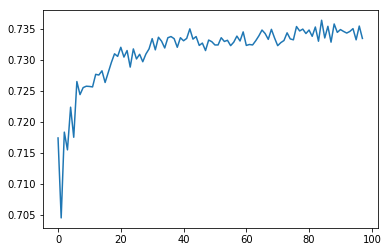

In [66]:
plt.plot(rsq_list)

### Major Injuries or Fatalities with Clusters

Still only working with some of the data (plus cluster label), no dummies

In [67]:
df['major_fatal'] = 0
df.loc[((df.majorinjuries_bicyclist>0) | (df.fatal_bicyclist>0) | 
        (df.majorinjuries_driver>0) | (df.fatal_driver>0) | 
        (df.majorinjuries_pedestrian>0) | (df.fatal_pedestrian>0)), 'major_fatal'] = 1

df.major_fatal.sum()

12312

In [68]:
feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster']

X = df[feature_cols]
y = df['major_fatal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [69]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
pd.crosstab(y_test, predictions)

col_0,0,1
major_fatal,,
0,23686,457
1,2327,94


### Major Injuries or Fatalities with Upsampling and Clusters

In [70]:
# upsampling the minority (like my original modeling)
df[df.major_fatal == 1].shape[0] / df[df.major_fatal == 0].shape[0]
majors = df.loc[df.major_fatal == 1]
low_injuries = df.loc[df.major_fatal == 0]

df_majors_upsampled = resample(majors, replace=True, n_samples=120507, random_state=42)
df_upsampled = pd.concat([df_majors_upsampled, low_injuries])

In [71]:
X = df_upsampled[feature_cols]
y = df_upsampled.major_fatal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
pd.crosstab(y_test, predictions)

col_0,0,1
major_fatal,,
0,9810,2325
1,582,11385


In [72]:
rfc.score(X_test, y_test)

0.8793876026885735

### Fatalities with Upsampling, Clusters

Note upsampling is on rows having eithr major injuries or fatalities, not on fatalities alone, because they are relatively few.  I will be predicting fatalities, so this may need to be reconsidered.

In [73]:
feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster']

X = df_upsampled[feature_cols]
y = df_upsampled.fatal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-2)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
pd.crosstab(y_test, predictions)

col_0,False,True
fatal,,
False,23936,16
True,38,112


### Ohhhh

But wow, I just got better results!  This was surprising to me.  I'm not even sure what this means.  

In [74]:
rfc.score(X_test, y_test)

0.9977595220313666

In [ ]:
582/11385=0.05112

38/112=0.339

### What happens if I only upsample on the fatalities

Fatalities represent 0.01 % of the rows.  Upsample by 100x to maybe make them 10% of the rows.  Risk: this also will _add major injuries_ to my majority rows, which may add noise to my fatality signal.

```df.loc[df.fatal].shape[0] / df.shape[0] = 0.001242292141937524```

In [78]:
df[df.major_fatal == 1].shape[0] / df[df.major_fatal == 0].shape[0]
#majors = df.loc[df.major_fatal == 1]
fatals = df.loc[df.fatal == 1]
nonfatals = df.loc[df.fatal == 0]

df_fatals_upsampled = resample(fatals, replace=True, n_samples=12051, random_state=42)
df_fatals_upsampled = pd.concat([df_fatals_upsampled, nonfatals])

In [80]:
df_fatals_upsampled.shape

(144705, 40)

In [81]:
feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster']

X = df_fatals_upsampled[feature_cols]
y = df_fatals_upsampled.fatal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-2)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
pd.crosstab(y_test, predictions)

col_0,False,True
fatal,,
False,13194,75
True,11,1191


In [82]:
rfc.score(X_test, y_test)

0.9940570796765946

In [85]:
from sklearn.metrics import confusion_matrix

df_fatals_upsampled['fatal_predictions'] = rfc.predict(X)
cm = confusion_matrix(df_fatals_upsampled.fatal, df_fatals_upsampled.fatal_predictions,
                 labels=None, sample_weight=None)
cm

array([[131945,    709],
       [   123,  11928]])

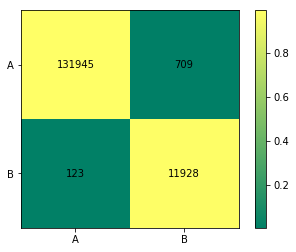

In [89]:
# credits for plot:  https://stackoverflow.com/questions/5821125/how-to-plot-confusion-matrix-with-string-axis-rather-than-integer-in-python

conf_arr = cm
norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)
    
fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.summer, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

cb = fig.colorbar(res)
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])
plt.savefig('fatality_confusion_matrix.png', format='png')
plt.show()

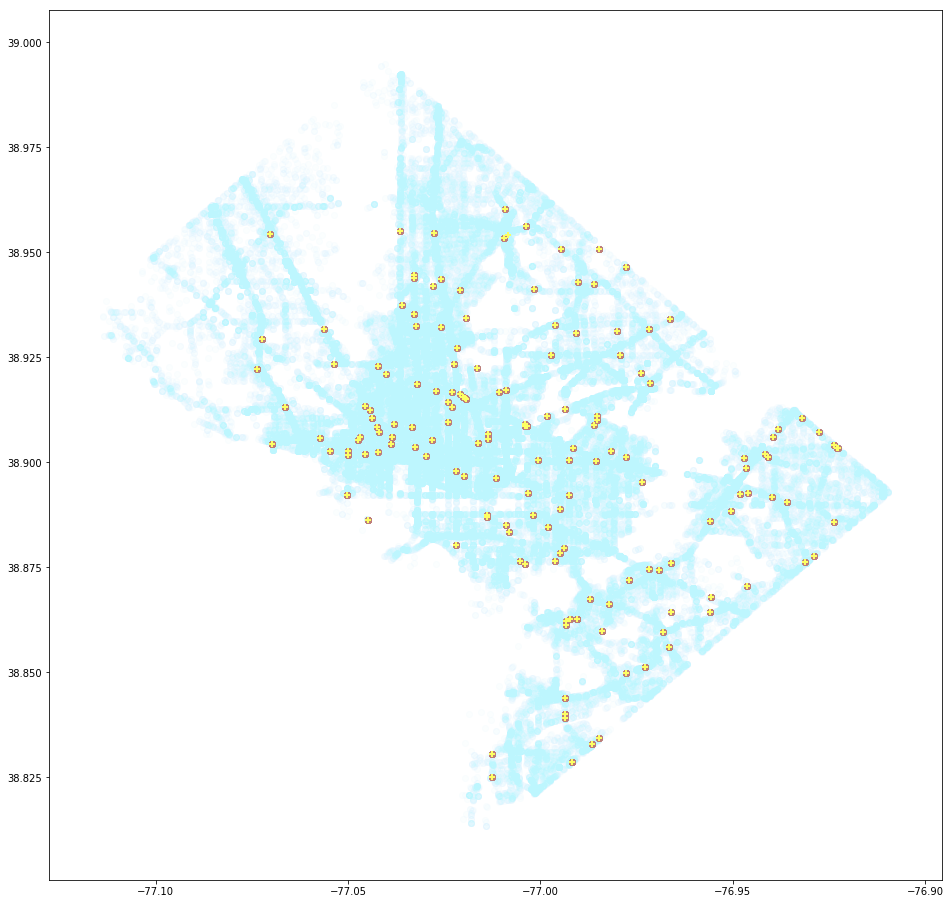

In [170]:
plt.rcParams['figure.figsize'] = [16.0, 16.0]
plt.scatter(df_fatals_upsampled.x, df_fatals_upsampled.y, c='#bdf6fe', alpha=0.05)
true_fatals = df_fatals_upsampled.loc[df_fatals_upsampled.fatal]
pred_fatals = df_fatals_upsampled.loc[df_fatals_upsampled.fatal_predictions]
plt.scatter(pred_fatals.x, pred_fatals.y, marker = 'o', c='#c27e79', alpha = 0.05)
#plt.scatter(true_fatals.x, true_fatals.y, c='#ff0789', marker='+', markersize=3, alpha=0.05)
plt.scatter(true_fatals.x, true_fatals.y, marker = '+', linewidth=2, c='#fdff63')

plt.show()

### Feature Importances

In [130]:
df_fatals_upsampled.columns
rfc.feature_importances_

array([6.36229931e-02, 1.16380054e-02, 1.39836685e-02, 5.37859920e-02,
       3.78083744e-02, 2.55405193e-01, 2.55874840e-01, 2.00245948e-05,
       2.97663410e-03, 1.54917777e-03, 2.77580621e-01, 2.57544760e-02])

In [131]:
rfc.decision_path(X)

(<144705x120752 sparse matrix of type '<class 'numpy.int64'>'
 	with 244263127 stored elements in Compressed Sparse Row format>,
 array([     0,   1217,   2396,   3573,   4812,   6041,   7160,   8383,
          9620,  10837,  12076,  13251,  14442,  15633,  16852,  18101,
         19252,  20441,  21634,  22867,  24074,  25331,  26524,  27685,
         28934,  30191,  31478,  32647,  33858,  35065,  36334,  37521,
         38724,  39905,  41104,  42337,  43572,  44753,  45890,  47071,
         48246,  49457,  50668,  51791,  52938,  54099,  55330,  56571,
         57836,  59069,  60268,  61459,  62682,  63899,  65180,  66387,
         67638,  68793,  69948,  71195,  72330,  73501,  74740,  75939,
         77130,  78337,  79570,  80771,  81978,  83189,  84380,  85595,
         86844,  88025,  89292,  90485,  91698,  92939,  94164,  95321,
         96518,  97741,  98914, 100077, 101246, 102435, 103684, 104893,
        106178, 107365, 108566, 109797, 111024, 112189, 113412, 114667,
       

### OK -- second look

Given the insane improvement, I suspect there may be something wrong with my model.  Because of the massive amount of upsampling, maybe I should try downsampling, or maybe I should only train on half of my data and test on the other half.  

1. First, train/test evenly
1. Then, try downsampling my majority data rather than creating so much of the fatal minority.

In [135]:
feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster']

X = df_fatals_upsampled[feature_cols]
y = df_fatals_upsampled.fatal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-2)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
pd.crosstab(y_test, predictions)

col_0,False,True
fatal,,
False,65918,337
True,106,5992


### Downsampling majority

In [163]:
#df[df.major_fatal == 1].shape[0] / df[df.major_fatal == 0].shape[0]
#majors = df.loc[df.major_fatal == 1]
fatals = df.loc[df.fatal == 1]
nonfatals = df.loc[df.fatal == 0]

df_fatals_downsampled = resample(nonfatals, replace=True, n_samples=165, random_state=42)
df_fatals_downsampled = pd.concat([df_fatals_downsampled, fatals])

In [164]:
df_fatals_downsampled.shape

(330, 40)

In [168]:
feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster']

X = df_fatals_downsampled[feature_cols]
y = df_fatals_downsampled.fatal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-2)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
pd.crosstab(y_test, predictions)

col_0,False,True
fatal,,
False,24,18
True,12,12


In [160]:
df.loc[df.fatal].shape

(165, 40)